In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, date, time
from phik.report import plot_correlation_matrix
from phik import phik_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_train_28062024.csv
/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_sample_submit_28062024.csv
/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_test_28062024.csv


In [69]:
import imblearn

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [71]:
from phik.report import plot_correlation_matrix
from phik import report

In [72]:
from imblearn.over_sampling import SMOTENC

In [73]:
import seaborn as sns

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 



In [74]:
train = pd.read_csv("/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_train_28062024.csv")

In [75]:
test = pd.read_csv("/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_test_28062024.csv")

In [76]:
ex = pd.read_csv("/kaggle/input/startups-operations-close-predictions-m1-41-ds/kaggle_startups_sample_submit_28062024.csv")

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


**Меняем тип данных в признаках founded_at, first_funding_at,last_funding_at,closed_at**

In [78]:
train["founded_at"] = pd.to_datetime(train["founded_at"])
train["closed_at"] = pd.to_datetime(train["closed_at"])
train["first_funding_at"] = pd.to_datetime(train["first_funding_at"])
train["last_funding_at"] = pd.to_datetime(train["last_funding_at"])

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


**Меняем тип данных в признаках first_funding_at,last_funding_at**

In [81]:
test["first_funding_at"] = pd.to_datetime(test["first_funding_at"])
test["last_funding_at"] = pd.to_datetime(test["last_funding_at"])

**Замечаем, что признаки в датасетах разные, созданием новый признак lifetime в тренировочном датасете с помощью данныех из founded_at, closed_at, затем удаляем признаки отсутствующие в тестовом датесете:founded_at, closed_at**

In [82]:
train["lifetime"] = np.where(train["status"]=='operating',(datetime(2018,1,1)- train["founded_at"]).dt.days,(train["closed_at"]-train["founded_at"]).dt.days)

In [83]:
train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,2998.0
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,4748.0
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,4383.0
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT,5114.0
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,2791.0


In [84]:
train["lifetime"] = train["lifetime"].astype("int64")

In [85]:
train = train.drop(["founded_at","closed_at"],axis=1)

In [86]:
def df_info(a):
    b = a.info()
    c = a.duplicated().sum()
    d = a.isna().sum()
    print("Количество дубликатов:",c)
    print("Пропуски")
    return(d)

In [87]:
df_info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB
Количество дубликатов: 0
Пропуски


name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

In [88]:
df_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   first_funding_at   52516 non-null  datetime64[ns]
 10  last_funding_at    52516 non-null  datetime64[ns]
 11  lifetime           52516 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 4.8+ MB
Количество дубликатов: 0
Пропуски


name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
first_funding_at         0
last_funding_at          0
lifetime                 0
dtype: int64

**Создаем новый признак: количество категорий, в которых представлена компания**

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   first_funding_at   52516 non-null  datetime64[ns]
 10  last_funding_at    52516 non-null  datetime64[ns]
 11  lifetime           52516 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 4.8+ MB


In [92]:
def cat_number(data):
    try:
        return data.count("|")+1
    except:
        return 0

In [93]:
train["cat_number"]=train["category_list"].apply(cat_number)


In [94]:
test["cat_number"]=test["category_list"].apply(cat_number)


In [95]:
train.sample(15)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,cat_number
40164,Definition 6,Advertising|Brand Marketing|Digital Media|E-Co...,15000000.0,operating,USA,GA,Atlanta,Atlanta,1,2009-07-13,2009-07-13,7670,8
24165,DealitLive.com,Curated Web|Online Shopping,300000.0,closed,USA,NJ,Newark,Fair Lawn,1,2009-01-01,2009-01-01,584,2
34159,GSIP Holdings,Business Services|Finance|Financial Services,2160000.0,operating,USA,NY,New York City,New York,1,2014-01-08,2014-01-08,1827,3
4597,"Dynova Laboratories,Inc.",Dietary Supplements|Health and Wellness|Health...,15000000.0,operating,USA,NJ,Newark,Parsippany,1,2009-12-04,2009-12-04,4383,4
2035,Webroot,Security,108912913.0,operating,USA,CO,Denver,Broomfield,2,2005-02-07,2010-12-19,7670,1
29138,ReefEdge,Web Hosting,28000000.0,operating,USA,NJ,Newark,Fort Lee,2,2001-07-02,2003-11-12,6575,1
50148,Lab42,Consulting|Market Research|Social Media|Surveys,NaN,operating,USA,IL,Chicago,Chicago,1,2010-10-01,2010-10-01,2710,4
35415,Altruik,Search|Search Marketing|SEO|Software,9499393.0,operating,USA,TX,Dallas,Dallas,4,2009-05-15,2012-04-12,3287,4
13911,Entellus Medical,Health Care,92000000.0,operating,USA,MN,Minneapolis,Plymouth,5,2006-04-01,2011-08-17,4293,1
37124,onlinetours,E-Commerce,9000000.0,operating,RUS,NaN,NaN,NaN,2,2012-01-10,2014-07-17,2557,1


**Смотрим на статистику,сколько категорий у компаний встречается чаще остальных, чтобы на основе этих данных создать новый признак**

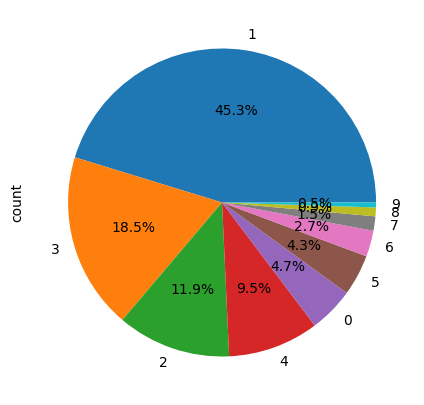

In [96]:
train["cat_number"].value_counts().head(10).plot.pie(y='count',autopct='%1.1f%%', figsize=(5, 5));

**Видим, что у 45.3 % компаний указана 1 катерогия, 94.7 от 1 до 5 категорий. Создаем новые признаки,cat1,cat2,cat3,cat4,cat5,где будут указаны значения первые пяти категорий(если они указаны)**

**Смотрим  на уникальные названия в перечне категорий, удаляем неявные дубликаты в названиях катерогий**

In [97]:
pd.set_option('display.max_rows', None)

In [98]:
all_cats = []
for a in train["category_list"]:
        try:
            all_cats.append(a)
        except TypeError:
            pass
                     

In [99]:
all_cats = pd.DataFrame(all_cats,columns=["category"])

In [100]:
all_cats["category"].sort_values(ascending=True).unique()

array(['3D', '3D Printing', '3D Printing|3D Technology', ...,
       'mHealth|Software', 'mHealth|Software|Therapeutics', nan],
      dtype=object)

In [101]:
train["category_list"] = train["category_list"].str.replace('Oil & Gas', 'Oil and Gas')
train["category_list"] = train["category_list"].str.replace('Games','Game')
train["category_list"] = train["category_list"].str.replace('Charities','Charity')
train["category_list"] = train["category_list"].str.replace('EBooks','E-Books')
train["category_list"] = train["category_list"].str.replace('Entertainment','Entertainment Industry')
train["category_list"] = train["category_list"].str.replace('Internet','Internet Technology')



In [102]:
test["category_list"] = test["category_list"].str.replace('Oil & Gas', 'Oil and Gas')
test["category_list"] = test["category_list"].str.replace('Games','Game')
test["category_list"] = test["category_list"].str.replace('Charities','Charity')
test["category_list"] = test["category_list"].str.replace('EBooks','E-Books')
test["category_list"] = test["category_list"].str.replace('Entertainment','Entertainment Industry')
test["category_list"] = test["category_list"].str.replace('Internet','Internet Technology')


In [103]:
def split(data):
    try:
        return data.split("|")
    except:
        return "nan"

In [104]:
train["category_list"] = train["category_list"].apply(split)

In [105]:
test["category_list"] = test["category_list"].apply(split)

In [106]:
test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,cat_number
0,Crystalsol,[Clean Technology],2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501,1
1,JBI Fish & Wings,[Hospitality],NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,1
2,COINPLUS,[Finance],428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,1
3,Imagine Communications,"[Software, Video, Video Streaming]",34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,3
4,DNA13,[Software],4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209,1


**Добавляем новые признаки: категории продукта из указанного списка категорий category_list**

In [107]:
def cat1 (data):
        return data[0]
    

In [108]:
def cat2 (data):
    if len(data) >1:
        return data[1]
    else:
        return "nan"
    

In [109]:
def cat3 (data):
    if len(data) >2:
        return data[2]
    else:
        return "nan"

In [110]:
def cat4 (data):
    if len(data) >3:
        return data[3]
    else:
        return "nan"

In [111]:
def cat5 (data):
    if len(data) >4:
        return data[4]
    else:
        return "nan"

In [112]:
train["cat1"] = train["category_list"].apply(cat1)
train["cat2"] = train["category_list"].apply(cat2)
train["cat3"] = train["category_list"].apply(cat3)
train["cat4"] = train["category_list"].apply(cat4)
train["cat5"] = train["category_list"].apply(cat5)

In [113]:
train["status"].unique()

array(['operating', 'closed'], dtype=object)

In [114]:
test["cat1"] = test["category_list"].apply(cat1)
test["cat2"] = test["category_list"].apply(cat2)
test["cat3"] = test["category_list"].apply(cat3)
test["cat4"] = test["category_list"].apply(cat4)
test["cat5"] = test["category_list"].apply(cat5)

In [115]:
train['year_first_funding'] = pd.DatetimeIndex(train['first_funding_at']).year


In [116]:
test['year_first_funding'] = pd.DatetimeIndex(test['first_funding_at']).year


In [117]:
train['month_first_funding'] = pd.DatetimeIndex(train['first_funding_at']).month


In [118]:
test['month_first_funding'] = pd.DatetimeIndex(test['first_funding_at']).month


In [119]:
train['year_last_funding'] = pd.DatetimeIndex(train['last_funding_at']).year

In [120]:
test['year_last_funding'] = pd.DatetimeIndex(test['last_funding_at']).year

In [121]:
train['month_last_funding'] = pd.DatetimeIndex(train['last_funding_at']).month

In [122]:
test['month_last_funding'] = pd.DatetimeIndex(test['last_funding_at']).month

**Создадим новый признак days_funded: дни беспрерывного финансирования.**

In [123]:
train["days_funded"] = (train["last_funding_at"]-train["first_funding_at"]).dt.days

In [124]:
test["days_funded"] = (test["last_funding_at"]-test["first_funding_at"]).dt.days

In [125]:
train.sample(10)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,...,cat1,cat2,cat3,cat4,cat5,year_first_funding,month_first_funding,year_last_funding,month_last_funding,days_funded
52348,traincamp.me,[Education],1.553761e+05,operating,BGR,42,Sofia,Sofia,4,2014-09-01,...,Education,nan,nan,nan,nan,2014,9,2015,8,334
6459,NEXON & Partners Center,[Game],2.882860e+05,operating,NaN,NaN,NaN,NaN,1,2005-07-05,...,Game,nan,nan,nan,nan,2005,7,2005,7,0
26427,FirePower Technology,[Manufacturing],5.000000e+05,closed,USA,CA,San Diego,Carlsbad,1,2014-02-24,...,Manufacturing,nan,nan,nan,nan,2014,2,2014,2,0
4913,Glow Digital Media,"[Advertising, Facebook Applications, Social Me...",8.250000e+06,operating,GBR,H9,London,London,2,2012-12-19,...,Advertising,Facebook Applications,Social Media,Social Media Advertising,Twitter Applications,2012,12,2014,7,580
13349,FARR Technologies,[Social Media],5.625000e+05,operating,USA,IA,IA - Other,Sioux City,1,2014-01-01,...,Social Media,nan,nan,nan,nan,2014,1,2014,1,0
3840,Itibia Technologies,[Enterprise Software],NaN,operating,CHN,4,Shanghai,Suzhou,1,2008-08-01,...,Enterprise Software,nan,nan,nan,nan,2008,8,2008,8,0
28026,Upstream,"[Advertising, App Marketing, Gamification, Int...",1.529110e+07,operating,USA,CA,SF Bay Area,Redwood City,1,2009-05-27,...,Advertising,App Marketing,Gamification,Internet Technology Marketing,Mobile,2009,5,2009,5,0
31141,AnchorFree,"[Mobile Security, Privacy, Security, Wireless]",6.280000e+07,operating,USA,CA,SF Bay Area,Menlo Park,3,2006-01-01,...,Mobile Security,Privacy,Security,Wireless,nan,2006,1,2012,5,2332
17505,"FreeWire Technologies, Inc.","[B2B, Electric Vehicles, Energy Storage, Servi...",NaN,operating,USA,CA,SF Bay Area,San Leandro,1,2014-10-20,...,B2B,Electric Vehicles,Energy Storage,Services,Technology,2014,10,2014,10,0
6388,remocean,"[Geospatial, Hardware + Software, Predictive A...",1.254600e+06,operating,ITA,4,Napoli,Napoli,1,2012-05-25,...,Geospatial,Hardware + Software,Predictive Analytics,nan,nan,2012,5,2012,5,0


**Чтобы не терять потенциально важные данные, заполняем funding_total_usd медианными значениями по первой категории продукта**

In [126]:
fill_data= pd.pivot_table(train,values="funding_total_usd",index=["cat1"],aggfunc="median")


In [127]:
for a in fill_data.index:
    train.loc[(train['cat1'] == a) & (train['funding_total_usd'].isna()), 'funding_total_usd'] = \
    train.loc[(train['cat1'] == a),'funding_total_usd'].median()


In [128]:
for a in fill_data.index:
    test.loc[(test['cat1'] == a) & (test['funding_total_usd'].isna()), 'funding_total_usd'] = \
    train.loc[(train['cat1'] == a),'funding_total_usd'].median()


In [129]:
train['funding_total_usd'].isna().sum()

18

In [130]:
train[train['funding_total_usd'].isna()]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,...,cat1,cat2,cat3,cat4,cat5,year_first_funding,month_first_funding,year_last_funding,month_last_funding,days_funded
937,Atakama Labs,"[Casual Game, Game, Social Game]",NaN,operating,CHL,12,Santiago,Santiago,1,2009-08-01,...,Casual Game,Game,Social Game,nan,nan,2009,8,2009,8,0
3482,KerjaDulu,[Social Recruiting],NaN,operating,IDN,4,Jakarta,Jakarta,1,2014-10-28,...,Social Recruiting,nan,nan,nan,nan,2014,10,2014,10,0
3997,E-Torial,"[Tutoring, Video]",NaN,operating,USA,CA,SF Bay Area,San Francisco,1,2015-01-07,...,Tutoring,Video,nan,nan,nan,2015,1,2015,1,0
6107,Loterity,[Lotteries],NaN,operating,POL,78,Warsaw,Warsaw,1,2012-12-01,...,Lotteries,nan,nan,nan,nan,2012,12,2012,12,0
6472,KeyOwner,"[Infrastructure Builders, Local Search, Price ...",NaN,operating,IND,16,Pune,Pune,1,2014-03-21,...,Infrastructure Builders,Local Search,Price Comparison,Real Estate,nan,2014,3,2014,3,0
8600,Best Bid,[Low Bid Auctions],NaN,operating,NaN,NaN,NaN,NaN,1,2010-10-01,...,Low Bid Auctions,nan,nan,nan,nan,2010,10,2010,10,0
8811,Windshield,[Virtual Workforces],NaN,operating,USA,MA,Boston,Boston,1,2015-05-05,...,Virtual Workforces,nan,nan,nan,nan,2015,5,2015,5,0
17013,EasyFix,"[Plumbers, Service Providers]",NaN,operating,IND,7,New Delhi,New Delhi,1,2015-09-23,...,Plumbers,Service Providers,nan,nan,nan,2015,9,2015,9,0
21459,gifted2you,"[Flowers, Gift Card, Mobile, Social Network Me...",NaN,operating,GBR,B9,London,Marlow,2,2012-02-01,...,Flowers,Gift Card,Mobile,Social Network Media,nan,2012,2,2012,12,304
21503,The Vet,[Veterinary],NaN,operating,GBR,H9,London,London,1,2013-02-01,...,Veterinary,nan,nan,nan,nan,2013,2,2013,2,0


In [131]:
train["region"] = train["region"].str.replace(" - Other"," ")

In [132]:
train["region"] = train["region"].str.replace(" - Other"," ")

**Cоздадим новые категориальные признаки на основе количественного признака funding_total_usd**

In [133]:
bin_labels_5 = ['1', '2', '3', '4', '5','6', '7', '8', '9','10']
train["funding_q3"] = pd.qcut(train['funding_total_usd'],
                              q=[0,.1, .2,.3, .4,.5, .6, .7, .8, .9,1], labels=bin_labels_5)
                              

In [134]:
names = []
for a in range(0,35):
    names.append(a)

train["funding_q"] = pd.qcut(train['funding_total_usd'],35,labels=names)

In [135]:
bin_labels_5 = ['1', '2', '3', '4', '5','6', '7', '8', '9','10']
test["funding_q3"] = pd.qcut(test['funding_total_usd'],
                              q=[0,.1, .2,.3, .4,.5, .6, .7, .8, .9,1], labels=bin_labels_5)
                              

In [136]:
names = []
for a in range(0,35):
    names.append(a)

test["funding_q"] = pd.qcut(test['funding_total_usd'],35,labels=names)

In [137]:
train.dropna(subset=["name","funding_total_usd","country_code","state_code","region","city","funding_q3","funding_q"],inplace=True)

In [138]:
train.isna().sum()

name                   0
category_list          0
funding_total_usd      0
status                 0
country_code           0
state_code             0
region                 0
city                   0
funding_rounds         0
first_funding_at       0
last_funding_at        0
lifetime               0
cat_number             0
cat1                   0
cat2                   0
cat3                   0
cat4                   0
cat5                   0
year_first_funding     0
month_first_funding    0
year_last_funding      0
month_last_funding     0
days_funded            0
funding_q3             0
funding_q              0
dtype: int64

**Удаляем признаки нерелевантные для анализа корреляции**

In [139]:
train_new = train.drop(["category_list","name","first_funding_at","last_funding_at"],axis=1)

In [140]:
train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,...,cat3,cat4,cat5,year_first_funding,month_first_funding,year_last_funding,month_last_funding,days_funded,funding_q3,funding_q
0,Lunchgate,"[Online Reservations, Restaurants]",828626.0,operating,CHE,25,Zurich,Zürich,2,2011-05-01,...,nan,nan,nan,2011,5,2014,12,1310,4,11
1,EarLens,"[Manufacturing, Medical, Medical Devices]",42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010-05-04,...,Medical Devices,nan,nan,2010,5,2014,2,1393,10,32
2,Reviva Pharmaceuticals,[Biotechnology],35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2012-08-20,...,nan,nan,nan,2012,8,2014,7,681,10,32
4,WireTough Cylinders,[Manufacturing],3875000.0,operating,USA,VA,VA,Bristol,1,2012-02-01,...,nan,nan,nan,2012,2,2012,2,0,7,22
5,Connected Sports Ventures,[Mobile],4300000.0,operating,USA,NJ,Newark,Princeton,1,2012-11-12,...,nan,nan,nan,2012,11,2012,11,0,7,23


In [141]:
def df_visual(a):
    print("дискретные значения")
    discrete = ["cat_number","funding_rounds","funding_q3","funding_q"]
    for x in discrete:
        plt.title(x)
        fig1 = sns.countplot(data=a,x=x)
        fig1.set_xlabel('число компаний')
        fig1.set_ylabel('значение')
        plt.show()
    print("категориальные признаки:")
    cat = ["country_code","region","city","state_code","cat1","cat2","cat3","month_last_funding","month_first_funding","year_first_funding","year_last_funding"]
#    train_str = a.select_dtypes(include="object")
    for z in cat:
            b = a.pivot_table(index=[z],values="name",aggfunc="count").head(10)
            b.plot.pie(subplots=True,autopct='%.2f',title=z,legend=False,figsize=(25,5))
            plt.show()
    print("количественные признаки:")
    plt.title("сумма финансирования")
    num = ["days_funded","funding_total_usd","lifetime"]
    for n in num:
         plt.title(n)
         fig3=sns.kdeplot(data=a, x=n)
   #     fig3=sns.boxplot(x=a[n])
         fig3.set(xlabel='значение', ylabel='число компаний')
         plt.show()


дискретные значения


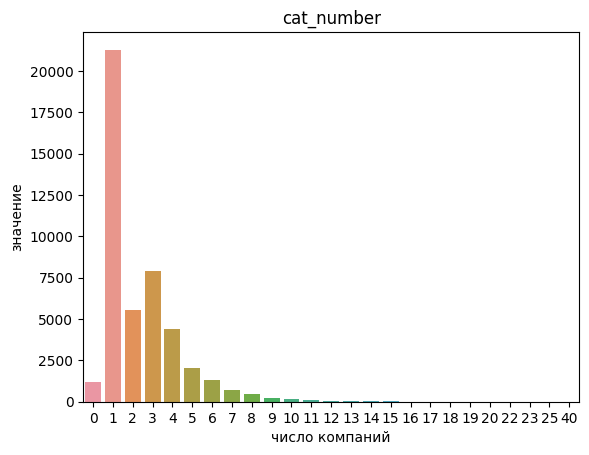

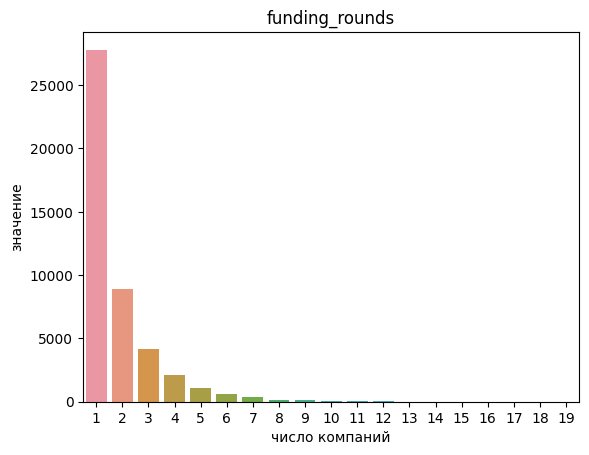

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


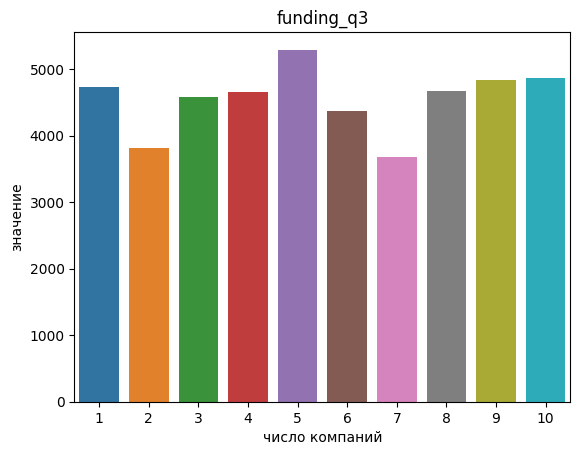

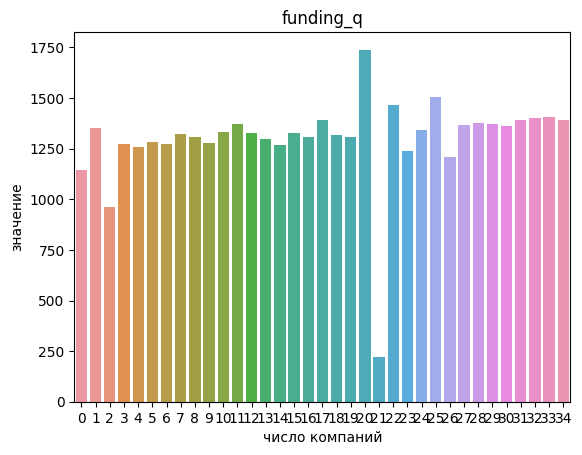

категориальные признаки:


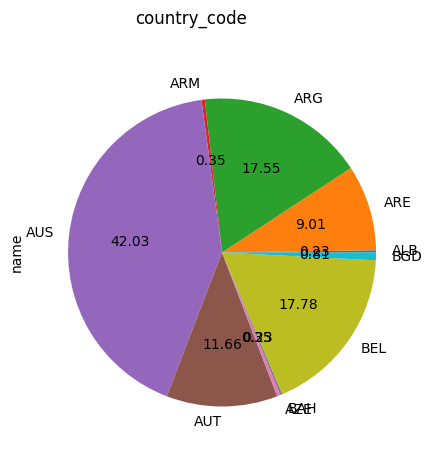

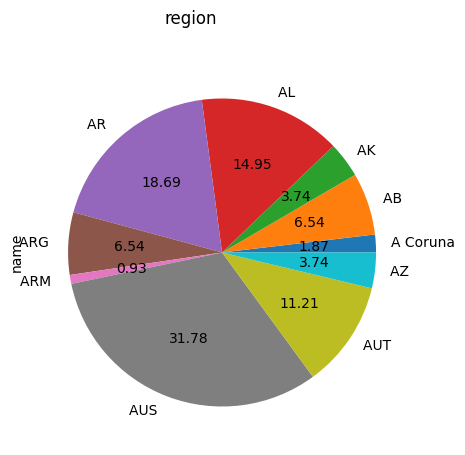

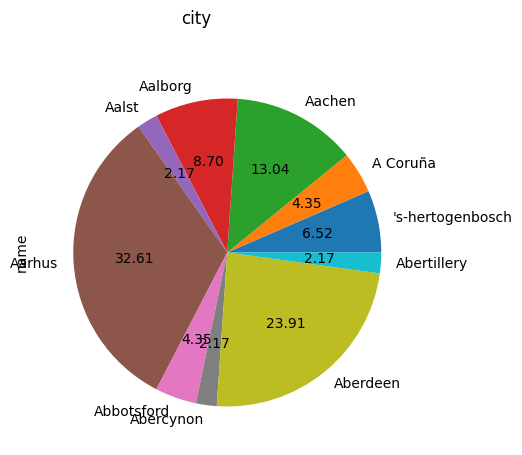

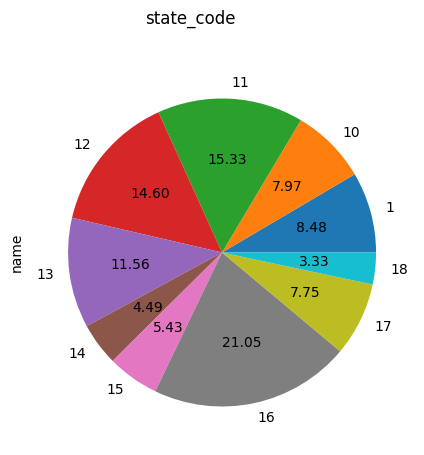

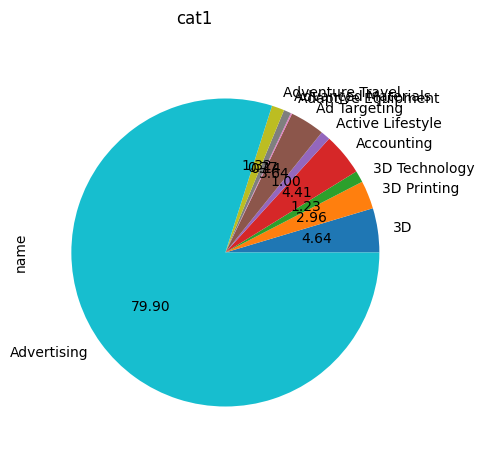

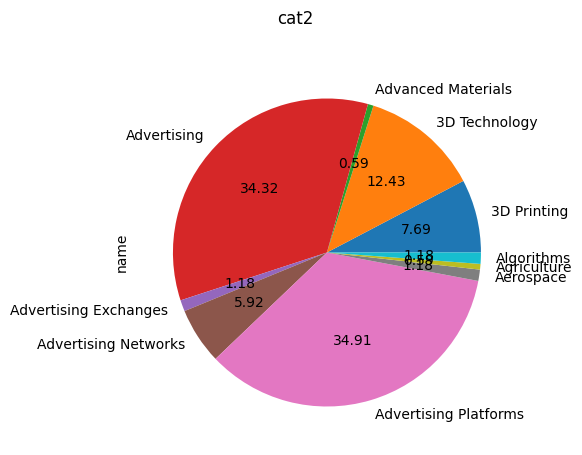

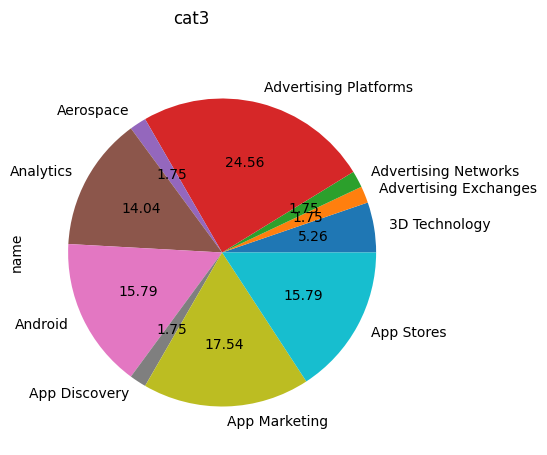

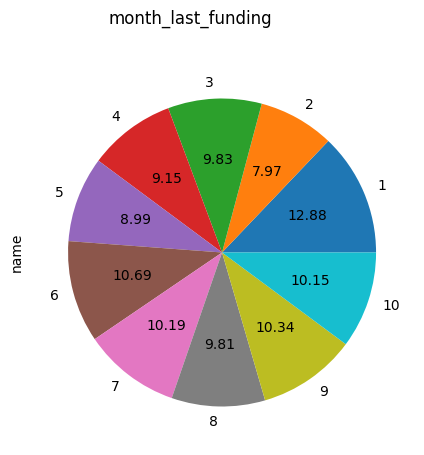

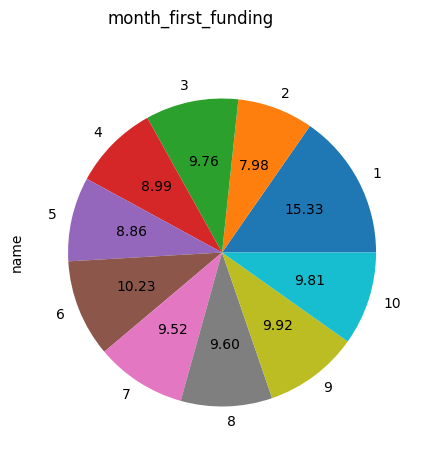

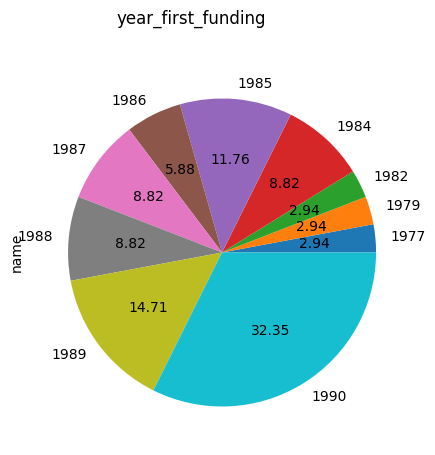

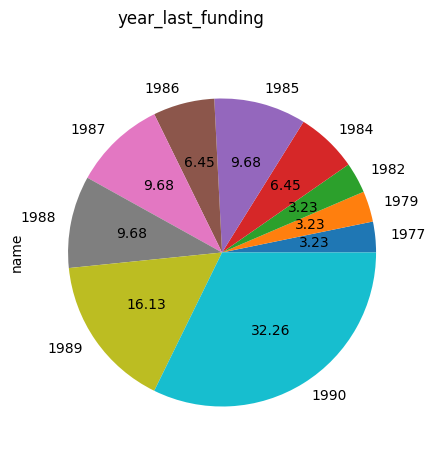

количественные признаки:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


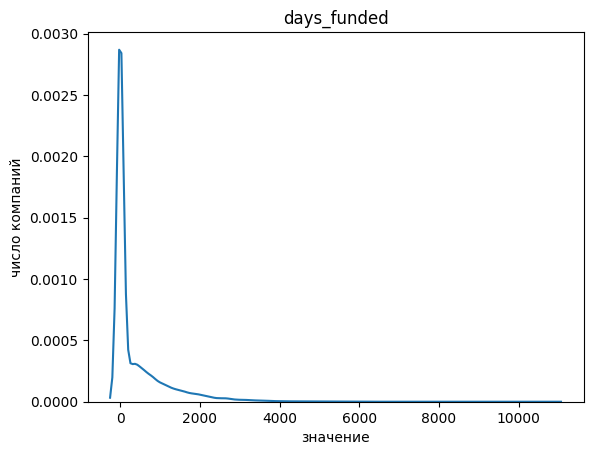

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


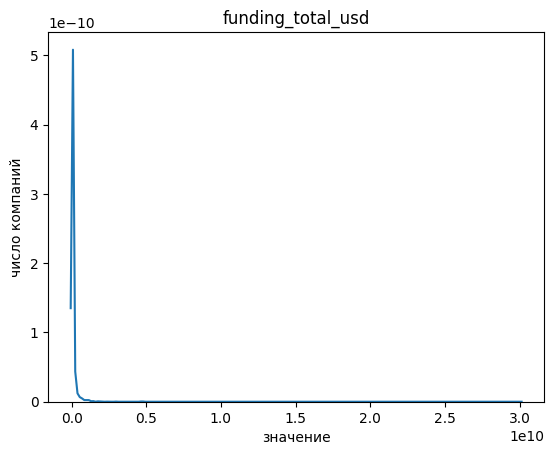

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


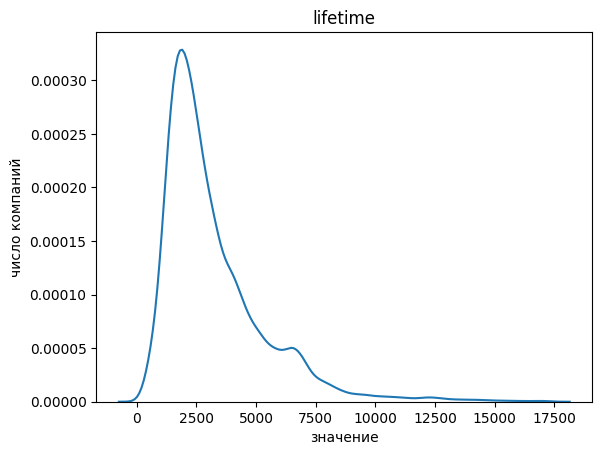

In [142]:
df_visual(train)

**При изучении признаков не выявлено аномальных значений: большой разброс данных в сумме финансирования в случае со стартапами является приемлимым. Переходим к анализу корреляций**

In [ ]:
df_visual(test)

In [143]:
from phik.report import plot_correlation_matrix
from phik import phik_matrix

interval_cols = ["funding_total_usd","lifetime","days_funded"]

phik_overview = phik_matrix(train_new, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15)
) 

/opt/conda/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable city is large: 4432. Are you sure this is not an interval variable? Analysis for pairs of variables including city can be slow.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable region is large: 1009. Are you sure this is not an interval variable? Analysis for pairs of variables including region can be slow.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 4471888. Are interval variables set correctly?
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3018192. Are interval variables set correctly?
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3394912. Are interval variables set correctly?
  warnings.warn(
/opt/conda/lib

KeyboardInterrupt: 

**Замечаем мультикорреляцию между такими признаками как: month_last_funding и month_first_funding, year_last_funding и year_first_fundingчто связано с тем, что у многих стартапов был один круг финансирования.Также наблюдаем сильную мультикорреляцию между категориями продукта(cat2,cat3)и их слабую корреляцию с таргетом (cat4,cat5).Ожидаемо высокая корреляция у признаков City, region, state_code,country_code.Избавляем от признаков с мультикорреляцией и низкой корреляцией с таргетом.Из последних четырех делаем выбор в пользу признака с наименьшим количеством пропусков**


In [144]:
train_new1 = train_new.drop(["cat2","cat3","cat4","cat5","city","region","state_code"],axis=1)

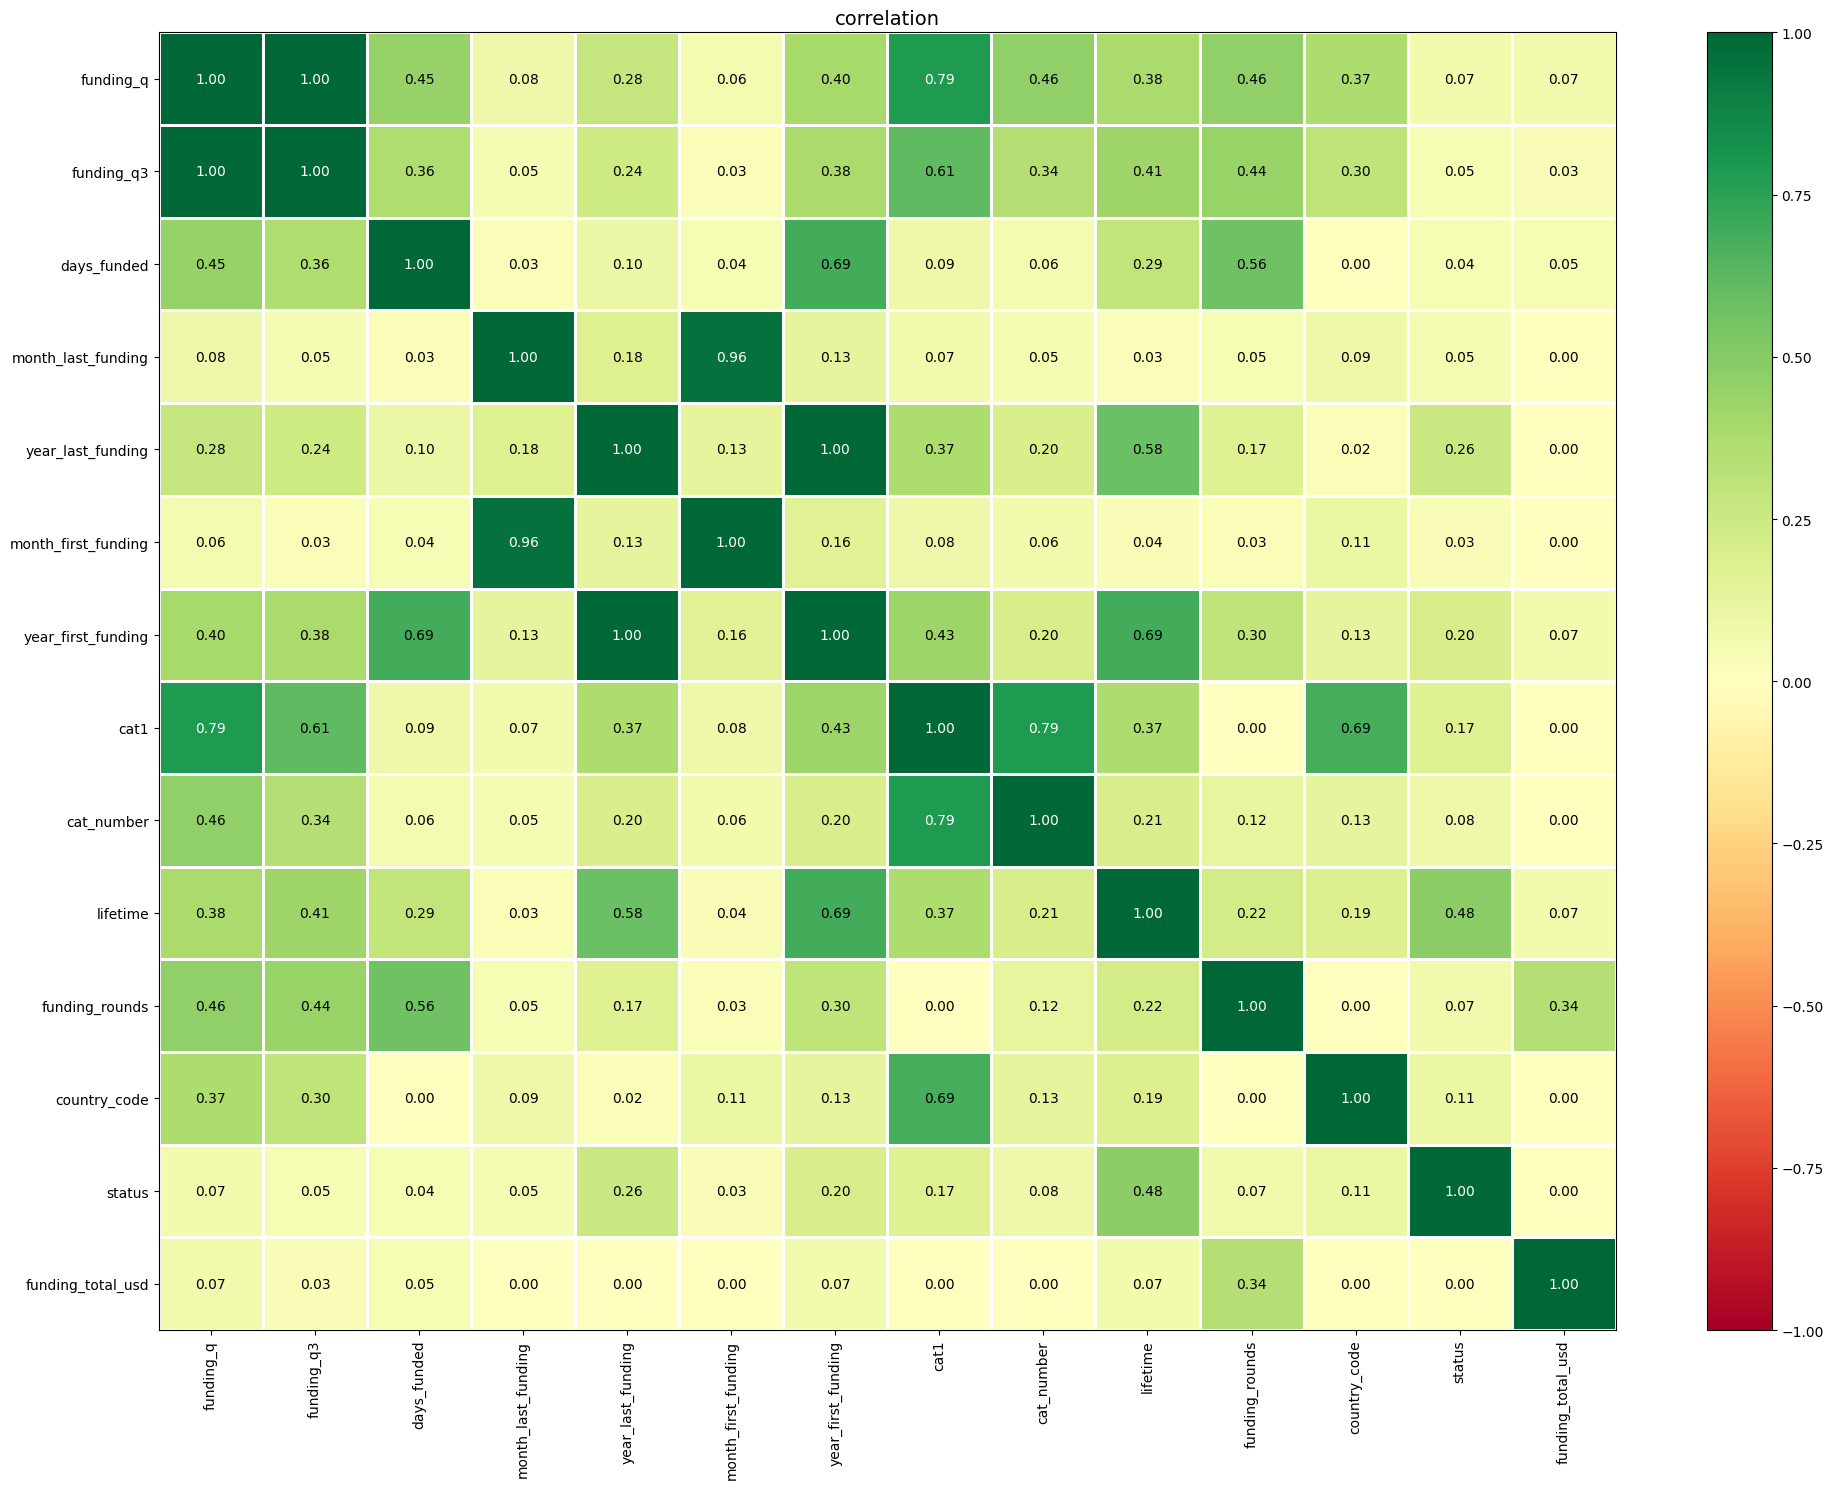

In [145]:
interval_cols = ["funding_total_usd","lifetime","days_funded"]

phik_overview2 = phik_matrix(train_new1, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview2.values,
    x_labels=phik_overview2.columns,
    y_labels=phik_overview2.index,
    figsize=(20, 15)
) 

**Удаляем непродуктивный признак funding_total_usd**

In [146]:
train_final = train_new1.drop(["funding_total_usd"],axis=1)

In [147]:
train_final["status"].value_counts()

status
operating    41995
closed        3507
Name: count, dtype: int64

компенсируем дисбаланс классов

In [ ]:
train_final.head()

In [148]:
le = LabelEncoder()
train_final['status'] = le.fit_transform(train_final['status'])

In [149]:
X_cl = train_final.drop("status",axis=1)
y_cl = train_final[["status"]]
TEST_SIZE=0.1

In [ ]:
X_cl.head()

In [150]:
ord_columns = ["funding_q3","funding_q"]
ohe_columns = ["cat1","year_first_funding","year_last_funding","country_code","month_first_funding","month_last_funding"]
num_columns = ["lifetime","funding_rounds","cat_number","days_funded"]

In [ ]:
from sklearn.metrics import f1_score, make_scorer

In [151]:
RANDOM_STATE = 46

In [152]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop="first",handle_unknown='ignore',sparse_output=False)
        )
    ]
    
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ])

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)],
         remainder='passthrough')


pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor)
    ]
)



In [153]:
pipe_final = pipe_final.fit(X_cl, y_cl)

In [154]:
X_train_new = pipe_final.transform(X_cl)

In [155]:
model_new = DecisionTreeClassifier(random_state=RANDOM_STATE)

parameters_new = {
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 15),
    'min_samples_leaf': range(1, 15)
}

rs = RandomizedSearchCV(
    model_new,
    parameters_new,
    n_jobs=-1,
    cv=5,
    scoring="f1",
    random_state=RANDOM_STATE
)
rs.fit(X_train_new,y_cl.values.ravel())
print(rs.best_score_)
rs.best_estimator_

0.987421586141491


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=46)

In [156]:
new_col = pipe_final.named_steps['preprocessor'].named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out()
new = list(np.concatenate([new_col,ord_columns,num_columns]))

In [158]:
model_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=46)

In [159]:
X_tree_feature = pd.DataFrame(X_train_new,columns=new)

In [160]:
model_tree.fit(X_tree_feature,y_cl)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=46)

In [161]:
x = model_tree.feature_importances_

In [163]:
feature_importance = pd.DataFrame({'Feature': new, 'Importance': x})

**Cмотрим на вес признаков, видим, что страна значительно не влияет на модель, так как в тестовом датасете большое количество пропусков в этом признаки, а модель делает точные предсказания без него, избавимся от него.**

In [164]:
feature_importance.sort_values(by="Importance",ascending=False).head(20)

,Feature,Importance
884,lifetime,0.634659
747,x2_2015,0.120874
712,x1_2014,0.085161
704,x1_2006,0.024014
706,x1_2008,0.021657
705,x1_2007,0.018827
703,x1_2005,0.017196
708,x1_2010,0.010315
702,x1_2004,0.008384
739,x2_2007,0.008122


In [165]:
X_cl = X_cl.drop(["country_code"],axis=1)


In [166]:
X_cl.isna().sum()

funding_rounds         0
lifetime               0
cat_number             0
cat1                   0
year_first_funding     0
month_first_funding    0
year_last_funding      0
month_last_funding     0
days_funded            0
funding_q3             0
funding_q              0
dtype: int64

In [ ]:
X_cl.head()

In [167]:
ord_columns = ["funding_q3","funding_q"]
ohe_columns = ["cat1","year_first_funding","year_last_funding","month_first_funding","month_last_funding"]
num_columns = ["lifetime","funding_rounds","cat_number","days_funded"]

In [168]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop="first",handle_unknown='ignore',sparse_output=False)
        )
    ]
    
)
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ])

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)],
         remainder='passthrough')


pipe_final2= Pipeline(
    [
        ('preprocessor', data_preprocessor)
    ]
)


In [169]:
pipe_final2 = pipe_final2.fit(X_cl, y_cl)


In [170]:
X_train_new2 = pipe_final2.transform(X_cl)

In [171]:
model_new = DecisionTreeClassifier(random_state=RANDOM_STATE)

parameters_new = {
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 15),
    'min_samples_leaf': range(1, 15)
}

rs = RandomizedSearchCV(
    model_new,
    parameters_new,
    n_jobs=-1,
    cv=5,
    scoring="f1",
    random_state=RANDOM_STATE
)
rs.fit(X_train_new2,y_cl.values.ravel())
print(rs.best_score_)
rs.best_estimator_

0.9874198040763323


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=46)

In [ ]:
X_cl.head()

In [184]:
test_final = test[["funding_rounds","lifetime","cat_number","cat1","year_first_funding","month_first_funding","year_last_funding","month_last_funding","days_funded","funding_q3","funding_q"]]

In [ ]:
test_final.info()

In [ ]:
test_final.info()

**Преобразовываем данные в пайплаине и делаем предказание**

In [186]:
X_test_trans = pipe_final2.transform(test_final)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [187]:
pred = rs.predict(X_test_trans)

In [188]:
pred_data = pd.DataFrame(pred,columns=["status"])

In [189]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  13125 non-null  int64
dtypes: int64(1)
memory usage: 102.7 KB


In [190]:
pred_data["status"].value_counts()

status
1    12145
0      980
Name: count, dtype: int64

In [191]:
pred_data["status"]=pred_data["status"].apply(lambda x: "operating" if x== 1 else "closed")

In [197]:
final_all = test.join(pred_data)

In [198]:
final = final_all[["name","status"]]

In [199]:
final.head()

,name,status
0,Crystalsol,operating
1,JBI Fish & Wings,operating
2,COINPLUS,operating
3,Imagine Communications,operating
4,DNA13,operating
